### Problem Statement:
What will be the insurance cost of a person?

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Data collection & Analysis

In [2]:
#reading data
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Numerical Features:**
* age
* bmi
* children

**Categoricla Features:**
* sex
* smoker
* region

**Response**
* Charges

### Exploratory Data Analysis

In [11]:
#statistical summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Age distribution')

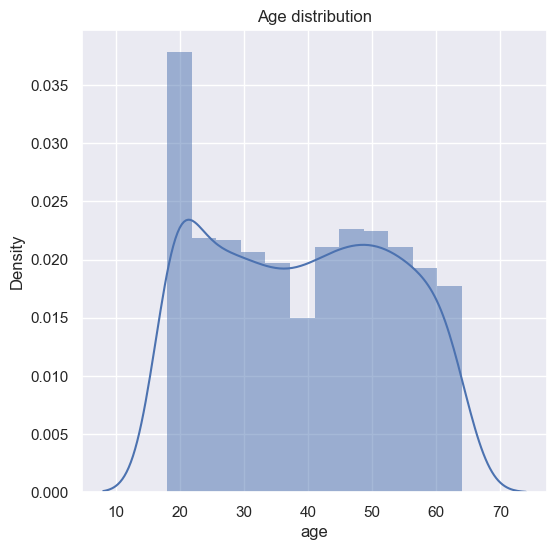

In [37]:
#distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(df['age'], kde=True, stat='density', linewidth=0, kde_kws=dict(cut=3))
plt.title('Age distribution')

* More number of people in the dataset has age ranging from 19 to 23
* Number of people with age greater than 23 is almost equal

Text(0.5, 1.0, 'Sex Distribution')

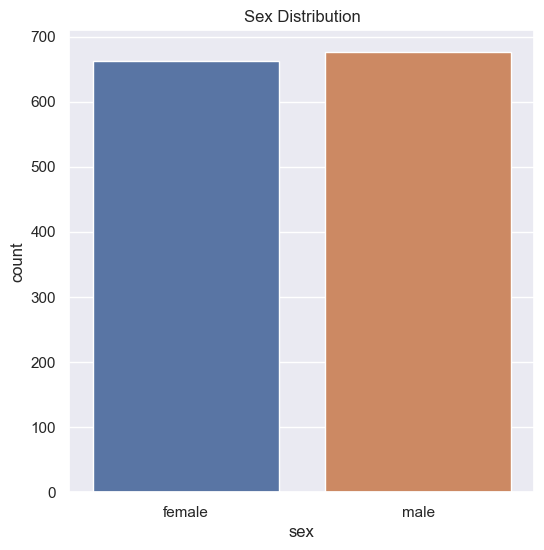

In [38]:
# distribution of gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')

* Count of gender is almost equal

In [39]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0.5, 1.0, 'BMI distribution')

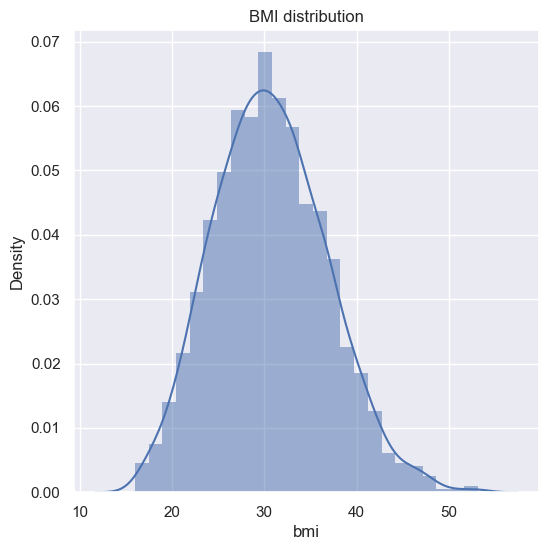

In [40]:
#dirtribution of bmi
plt.figure(figsize=(6,6))
sns.histplot(df['bmi'], kde=True, stat='density', linewidth=0, kde_kws=dict(cut=3))
plt.title('BMI distribution')

* bmi follows a normal distribution
* Normal Bmi range is 18.5 to 24.9 which means that most of the people in the dataset is of overweight

Text(0.5, 1.0, 'Distribution of Children')

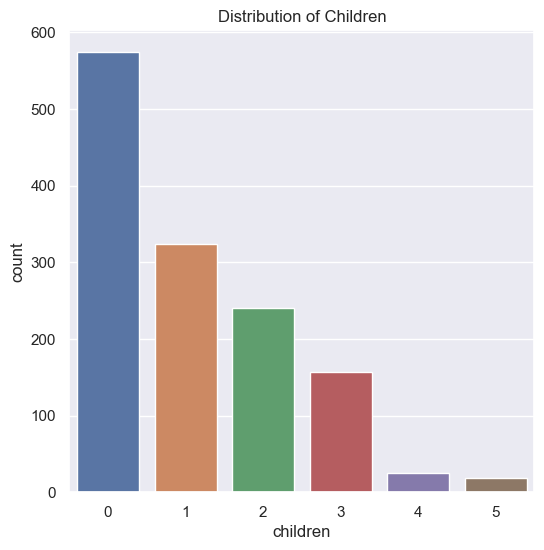

In [41]:
#distribution of children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Distribution of Children')

* Most number of people have 0 children
* Number of people with children above 4 is very low

In [42]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Count of smoker')

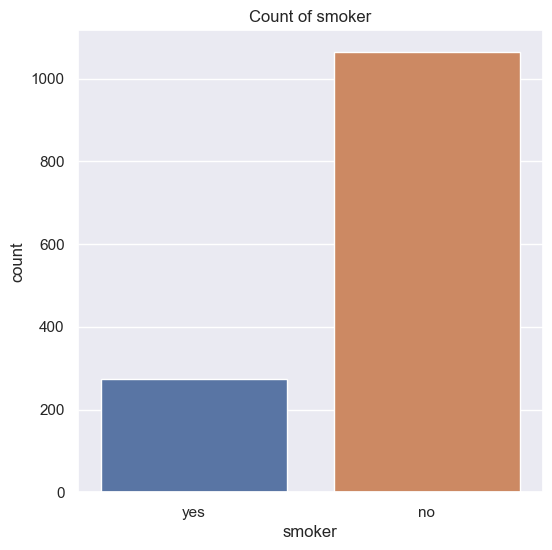

In [43]:
#distribution of smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Count of smoker')

* Non smoker dominates this dataset

In [44]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Distribution of Region')

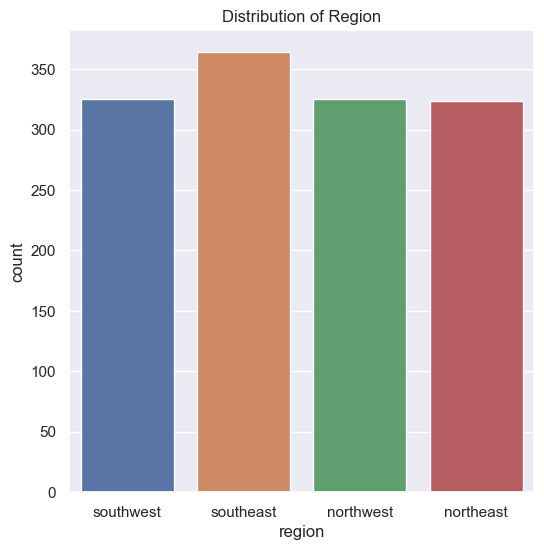

In [45]:
#distribution of region
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Distribution of Region')

* Southeast region leads the group with marginally more number of people
* Rest regions have almost equal number of people

In [46]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'Charges distribution')

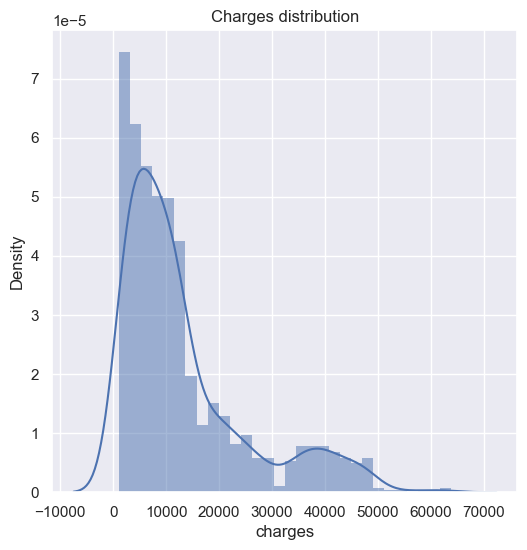

In [47]:
#distribution of charges
plt.figure(figsize=(6,6))
sns.histplot(df['charges'], kde=True, stat='density', linewidth=0, kde_kws=dict(cut=3))
plt.title('Charges distribution')

* Charges follows a right skewed distribution

### Data Preprocessing

##### Encoding categorical features

In [48]:
#encoding sex column
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#encoding region column
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


##### Splitting Features and Target

In [77]:
X = df.iloc[:, :-1].values
X

array([[19.  ,  1.  , 27.9 ,  0.  ,  0.  ,  1.  ],
       [18.  ,  0.  , 33.77,  1.  ,  1.  ,  0.  ],
       [28.  ,  0.  , 33.  ,  3.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  1.  ,  0.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  1.  ,  1.  ],
       [61.  ,  1.  , 29.07,  0.  ,  0.  ,  3.  ]])

In [78]:
y = df['charges'].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

##### Splitting the dataset to Training and Testing data

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [80]:
X_train.shape

(1070, 6)

In [81]:
X_test.shape

(268, 6)

### Model Training

##### Linear regression

In [82]:
#creating instance of the model
lr = LinearRegression()

In [83]:
#training the model
lr.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [84]:
#prediction on training data
y_pred = lr.predict(X_train)

In [85]:
# R squared value
r2_train = metrics.r2_score(y_train, y_pred)
r2_train

0.751505643411174

In [86]:
#prediction on testing data
y_pred = lr.predict(X_test)

In [87]:
# R squared value
r2_test = metrics.r2_score(y_test, y_pred)
r2_test

0.7447273869684077

### Building a Predictive System

In [105]:
input_data = [31, 1, 25.74, 0, 1, 0]

#changing input to numpy array
input_data = np.asarray(input_data)

input_data = input_data.reshape(1, -1)

In [102]:
prediction = lr.predict(input_data)

In [103]:
print('Insurance cost is USD ', prediction[0])

Insurance cost is USD  3760.080576496077
